In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spaceship-titanic/sample_submission.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/test.csv


In [2]:
train_set = pd.read_csv('/kaggle/input/spaceship-titanic/train.csv')
test_set = pd.read_csv('/kaggle/input/spaceship-titanic/test.csv')

In [3]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


All features have missing values, except `PassengerId`.

In [4]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


In [5]:
train_set.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


Before diving more into the dataset, I will 

- create `Deck` and `Side` from `Cabin`
- create `GroupSize` from `PassengerId`
- remove `Name`, `PassengerId`, `Cabin`

In [6]:
# create 'Deck' and 'Side' from 'Cabin'
deck, side = [], []

bool = train_set["Cabin"].isnull()
for i in range(len(train_set)):
    cabin = train_set["Cabin"][i]
    if bool[i]:
        deck.append(np.NaN)
        side.append(np.NaN)
    else:
        comp = cabin.split('/')
        deck.append(comp[0])
        side.append(comp[2])
        
train_set["Deck"] = deck
train_set["Side"] = side

In [7]:
# create 'GroupSize' from 'PassengerId'
train_set['GroupSize'] = [pid.split('_')[1] for pid in train_set.PassengerId]

In [8]:
# Drop 'Name', 'PassengerId', 'Cabin'
train_set = train_set.drop(['Name', 'PassengerId', 'Cabin'], axis=1)

# **Brief Look at train and test sets**

In [9]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8492 non-null   object 
 1   CryoSleep     8476 non-null   object 
 2   Destination   8511 non-null   object 
 3   Age           8514 non-null   float64
 4   VIP           8490 non-null   object 
 5   RoomService   8512 non-null   float64
 6   FoodCourt     8510 non-null   float64
 7   ShoppingMall  8485 non-null   float64
 8   Spa           8510 non-null   float64
 9   VRDeck        8505 non-null   float64
 10  Transported   8693 non-null   bool   
 11  Deck          8494 non-null   object 
 12  Side          8494 non-null   object 
 13  GroupSize     8693 non-null   object 
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


**Observations:**

- Categorical variables:

     `HomePlanet`,`CryoSleep`, `Destination`, `VIP`,  `Deck`, `Side`, `GroupSize`

- Numerical variables:

     `Age`, `RoomService`, `FoodCourt`, `ShoppingMall`, `Spa`, `VRDeck`

In [10]:
cat_features = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Deck', 'Side', 'GroupSize']
num_features = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

In [11]:
train_set.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


# **Visualization and Exploration**

1. Histogram for labels 

2. Histogram for each categorical variable

3. Scatterplot for each numerical variable

4. Correlation for each numerical variable

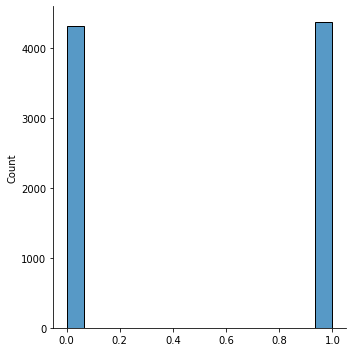

In [12]:
# Histogram for labels
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns


Transported_int = np.zeros([len(train_set)])
Transported_int[train_set['Transported'] == True] = 1
sns.displot(Transported_int)

**Observation:**

Same size for each label.

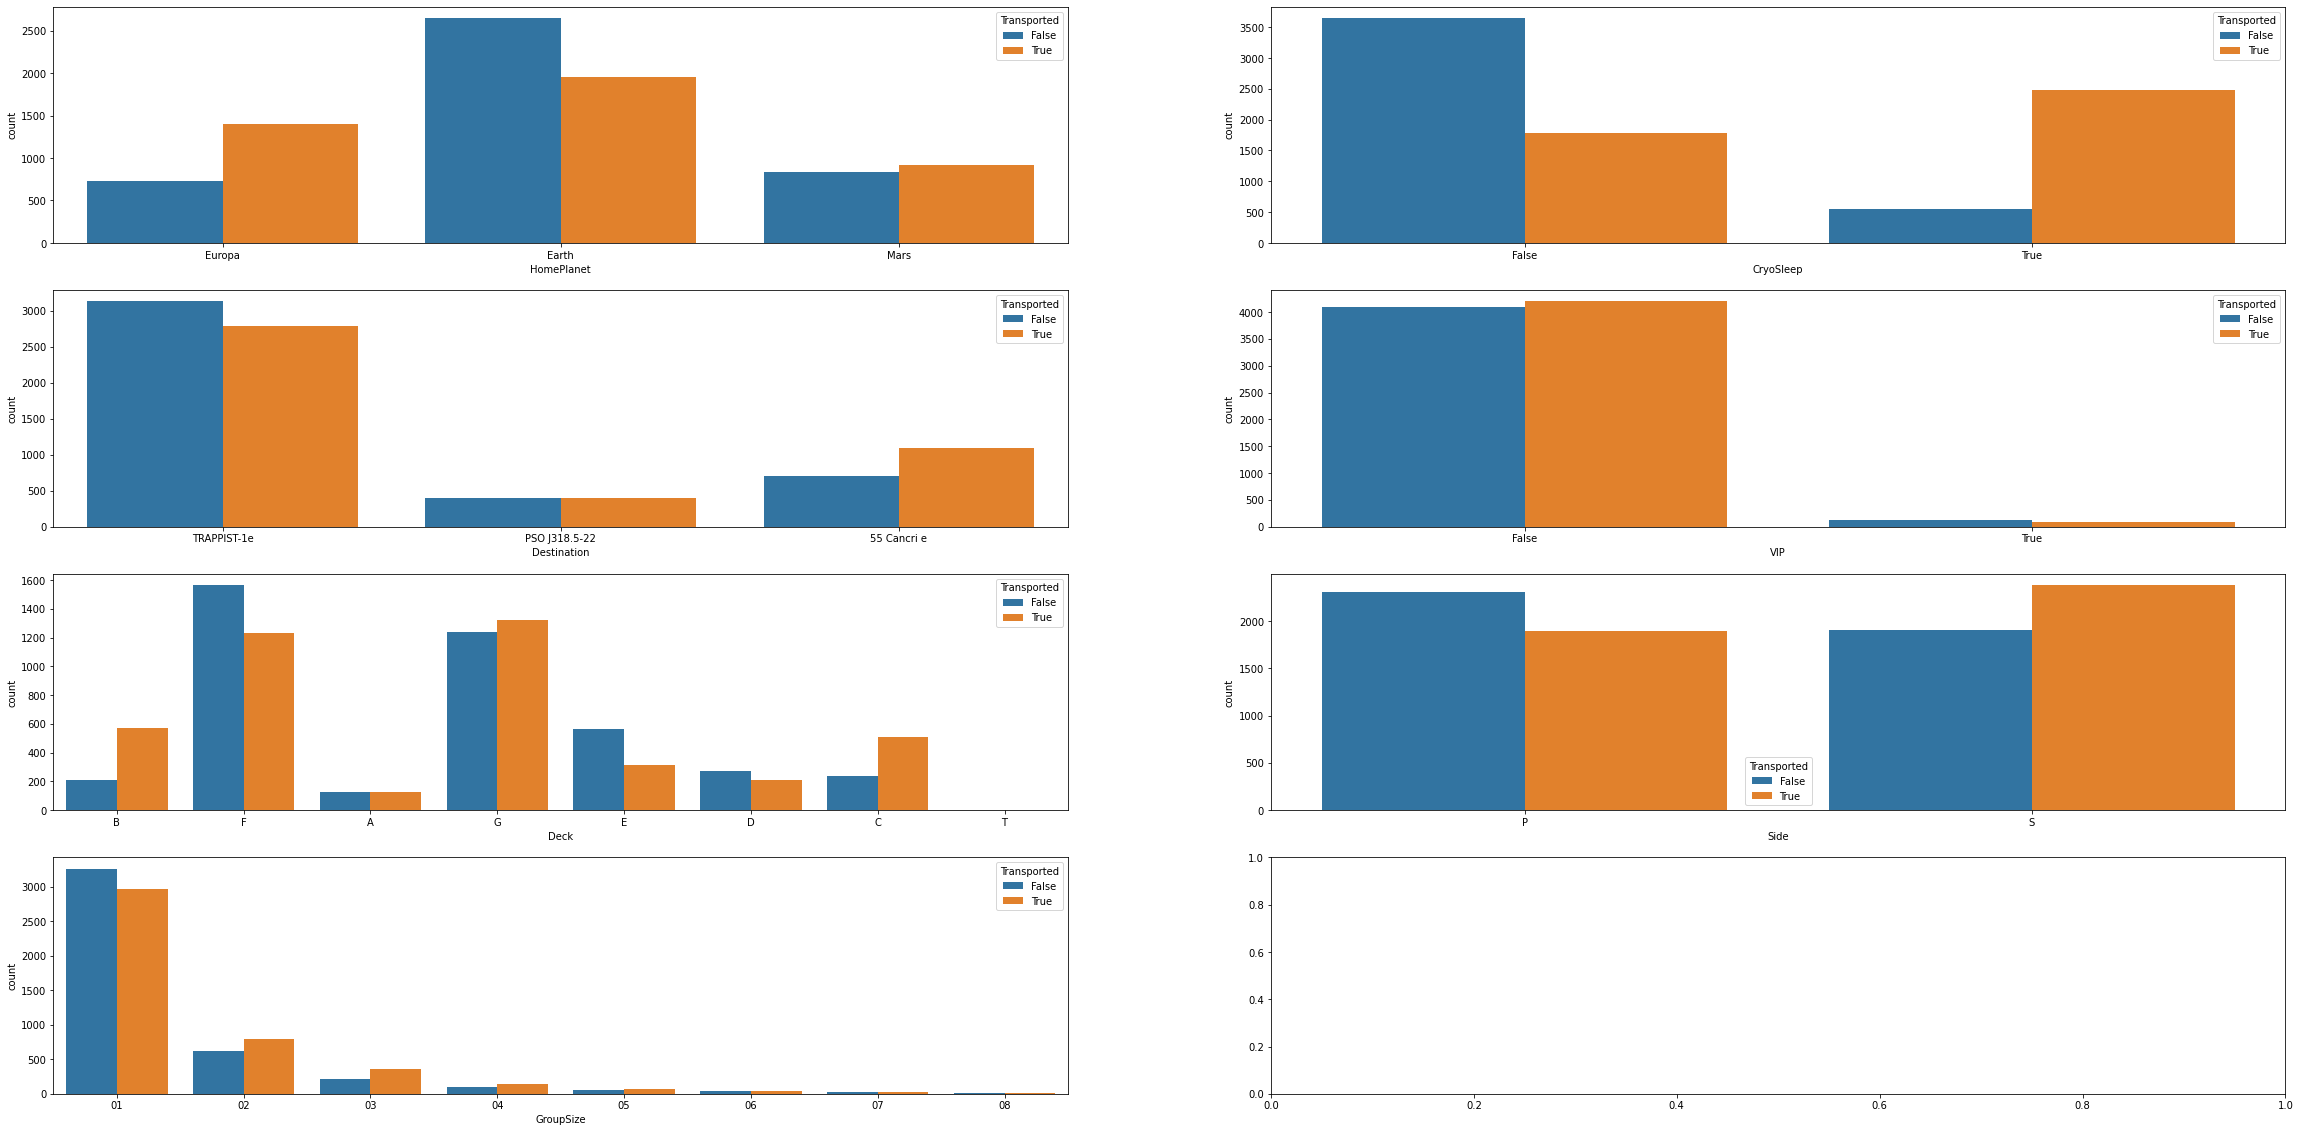

In [13]:
# Histogram for each categorical variable
fig, axes = plt.subplots(4, 2, figsize=(40,20))
ax = [axes[0,0], axes[0,1], axes[1,0], axes[1,1], axes[2,0], axes[2,1], axes[3,0]]

for i in range(len(cat_features)):
    feature = cat_features[i]
    sns.countplot(x=feature, hue='Transported', data=train_set, ax=ax[i])

In [14]:
for feature in cat_features:
    s = train_set.groupby([feature])['Transported'].value_counts(normalize=True)
    print(s)

HomePlanet  Transported
Earth       False          0.576054
            True           0.423946
Europa      True           0.658846
            False          0.341154
Mars        True           0.523024
            False          0.476976
Name: Transported, dtype: float64
CryoSleep  Transported
False      False          0.671079
           True           0.328921
True       True           0.817583
           False          0.182417
Name: Transported, dtype: float64
Destination    Transported
55 Cancri e    True           0.610000
               False          0.390000
PSO J318.5-22  True           0.503769
               False          0.496231
TRAPPIST-1e    False          0.528825
               True           0.471175
Name: Transported, dtype: float64
VIP    Transported
False  True           0.506332
       False          0.493668
True   False          0.618090
       True           0.381910
Name: Transported, dtype: float64
Deck  Transported
A     False          0.503906
      Tru

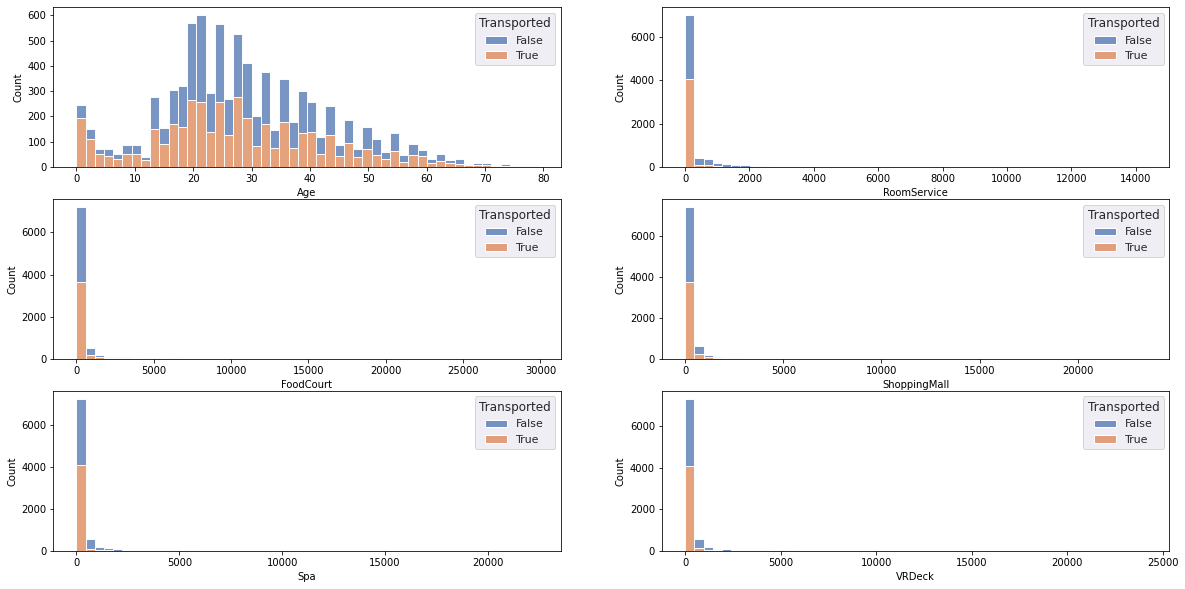

In [15]:
# Scatterplot for each numerical variable

fig, axes = plt.subplots(3, 2, figsize=(20,10))
ax = [axes[0,0], axes[0,1], axes[1,0], axes[1,1], axes[2,0], axes[2,1]]

for i in range(len(num_features)):
    feature = num_features[i]
    sns.set(style="darkgrid")
    sns.histplot(data=train_set, x=feature, hue="Transported", bins=50, multiple='stack',
                ax=ax[i])

In [16]:
# correlation for numerical variables
corr_matrix = train_set.corr()
corr_matrix

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
Age,1.000000,0.068723,0.130421,0.033133,0.123970,0.101007,-0.075026
RoomService,0.068723,1.000000,-0.015889,0.054480,0.010080,-0.019581,-0.244611
FoodCourt,0.130421,-0.015889,1.000000,-0.014228,0.221891,0.227995,0.046566
ShoppingMall,0.033133,0.054480,-0.014228,1.000000,0.013879,-0.007322,0.010141
Spa,0.123970,0.010080,0.221891,0.013879,1.000000,0.153821,-0.221131
VRDeck,0.101007,-0.019581,0.227995,-0.007322,0.153821,1.000000,-0.207075
Transported,-0.075026,-0.244611,0.046566,0.010141,-0.221131,-0.207075,1.000000


In [17]:
corr_matrix["Transported"]

Age            -0.075026
RoomService    -0.244611
FoodCourt       0.046566
ShoppingMall    0.010141
Spa            -0.221131
VRDeck         -0.207075
Transported     1.000000
Name: Transported, dtype: float64

**Observations:**

- `RoomService`, `Spa`, `VRDeck` are correlated with `Transported`.
-  Notice the correlation between `VRDeck`, `FoodCourt`, `Spa`.

# **Split the train_set into a smaller train_set and a test set**

Split the set into 2 groups such that both have same distributions of 'Transported'.

In [18]:
# Split the train_set into a smaller train_set and a test set
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, val_index in split.split(train_set, train_set['Transported']):
    strain_set = train_set.loc[train_index]
    val_set = train_set.loc[val_index]

strain_y = strain_set['Transported']
strain_x = strain_set.drop('Transported', axis=1)

val_y = val_set['Transported']
val_x = val_set.drop('Transported', axis=1)

# **Pipeline: Data cleaning + Addition of new features**

Implement the following tasks:

1.  categorical features: 
        
       - group `GroupSize` into 5 groups 
       
       - group `Age` into 6 groups
       
       - replace missing values with respective most frequent categories
        
       - apply one-hot encoding for categorical features
2.  numerical features:

       - replace missing values with respective medians
      
       - apply standardization
    

**Note: the following code requires simplication!**

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin

cat_features = ['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP', 'Deck', 'Side', 'GroupSize']
num_features = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

class GroupSizeSplits(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        groupsize = np.array(X["GroupSize"], dtype='int').copy()
        labels = np.zeros(len(X), dtype='object')
        for i in range(len(X)):
            if (groupsize[i]>=2 and groupsize[i]<5):
                labels[i]=1
            elif (groupsize[i]>=5 and groupsize[i]<7):
                labels[i]=2
            elif (groupsize[i]==7):
                labels[i]=3
            elif (groupsize[i]>=8):
                labels[i]=4
        X_new = X.copy()
        X_new["GroupSize"]=labels
        return X_new

class AgeSplits(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        age = np.array(X["Age"])
        labels = np.zeros(len(X), dtype='object')
        for i in range(len(X)):
            if age[i] >18 and age[i] <=28:
                labels[i]=1
            elif age[i] >28 and age[i] <=38:
                labels[i]=2
            elif age[i] >38 and age[i] <=48:
                labels[i]=3
            elif age[i] >48 and age[i] <=58:
                labels[i]=4
            elif age[i] >58:
                labels[i]=5
        X_new = X.copy()
        X_new["Age"]=labels
        return X_new

class ImputerOneHot_df(BaseEstimator, TransformerMixin):
    #column_names = []
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        imputer = SimpleImputer(strategy="most_frequent")
        onehot_encoder = OneHotEncoder()
        X_impute = imputer.fit_transform(X)
        X_onehot = onehot_encoder.fit_transform(X_impute).toarray()
        onehot_cats = onehot_encoder.categories_
        cat_features = X.columns
        self.column_names = []
        for i in range(len(cat_features)):
            name = cat_features[i]
            cats = onehot_cats[i]
            for cat in cats:
                full_name = f'{name}:{cat}'
                self.column_names.append(full_name) 
        X_new = pd.DataFrame(X_onehot, columns=self.column_names)
        return X_new    

class NumTransformer(BaseEstimator, TransformerMixin):
    #column_names = []
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        imputer = SimpleImputer(strategy="median")
        std_scaler = StandardScaler()
        X_impute = imputer.fit_transform(X)
        X_scaled = std_scaler.fit_transform(X_impute)
        self.column_names = list(X.columns)
        X_new = pd.DataFrame(X_scaled, columns=X.columns)
        return X_new
    
class TotalTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, num_features, cat_features):
        self.num_features = num_features
        self.cat_features = cat_features
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        groupsize_encoder = GroupSizeSplits()
        age_encoder = AgeSplits()        
        imputeronehot_encoder = ImputerOneHot_df()
        num_transform = NumTransformer()
        
        cat_pipeline = Pipeline([
            ('groupsize_encoder', groupsize_encoder),
            ('age_encoder', age_encoder),
            ('imputeronehot_encoder', imputeronehot_encoder),
        ])
        X_cat_transform = cat_pipeline.fit_transform(X[self.cat_features])
        X_num_transform = num_transform.fit_transform(X[self.num_features])
        X_new = pd.concat([X_num_transform, X_cat_transform], axis=1)
        self.column_names = X_new.columns
        return X_new


transformer = TotalTransformer(num_features, cat_features)
strain_prepared = transformer.fit_transform(strain_x)
val_prepared = transformer.transform(val_x)

# **Feature Combination / Addition of New Feature(s)**

1. Create `AmountBilled`

2. Create boolean features for `RoomService`, `FoodCourt`, `ShoppingMall`, `Spa`, `VRDeck`  (Excluded)


In [20]:
# Create `AmountBilled` and remove `RoomService`, `FoodCourt`, `ShoppingMall`, `Spa`, `VRDeck` 
lux = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
strain_prepared['AmountBilled'] = strain_prepared[lux].sum(axis=1)

strain_prepared = strain_prepared.drop(lux, axis=1)

In [21]:
val_prepared['AmountBilled'] = val_prepared[lux].sum(axis=1)
val_prepared = val_prepared.drop(lux, axis=1)

# **Data Visualization using Different Dimensionality Reduction Techniques**

    - PCA
    - RBF kernel PCA
    - Locally linear embedding PCA

In [22]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X2D = pca.fit_transform(strain_prepared)
pca.explained_variance_ratio_

array([0.62373188, 0.05708519])

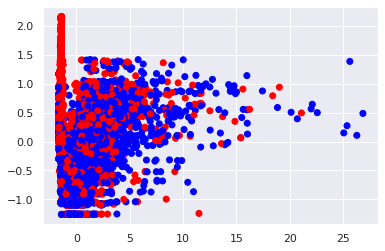

In [23]:
cols = np.repeat('blue',len(strain_y))
cols[strain_y == True] = 'red'
plt.scatter(x=X2D[:,0], y=X2D[:,1], color = cols)

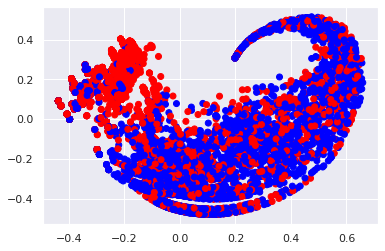

In [24]:
# Try kernel PCA
from sklearn.decomposition import KernelPCA

rbf_pca = KernelPCA(n_components=2, kernel="rbf", gamma=0.1)
X2D_kernel = rbf_pca.fit_transform(strain_prepared)
plt.scatter(x=X2D_kernel[:,0], y=X2D_kernel[:,1], color = cols)

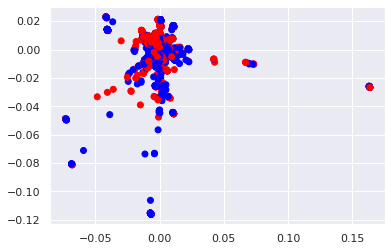

In [25]:
# Try Locally Linear Embedding
from sklearn.manifold import LocallyLinearEmbedding

lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10)
X2D_lle = lle.fit_transform(strain_prepared)

plt.scatter(x=X2D_lle[:,0], y=X2D_lle[:,1], color = cols)

# **Train the model**

1. Logistic Regression
2. Random Forest
3. Neural Network

In [26]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=300)
log_reg.fit(strain_prepared, strain_y)
y_pred = log_reg.predict(val_prepared)

Accuracy score is used because the distribution of 2 classes are almost equal.

In [27]:
from sklearn.metrics import accuracy_score

accuracy_score(val_y, y_pred)

0.7245543415756182

In [28]:
# Random Forest
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = [
    {
    'max_depth':[4,6,8,10,12]
    
    }
]
rnd_clf = RandomForestClassifier(bootstrap=True, n_estimators=500, n_jobs=-1,
                                oob_score=True)
grid_search = GridSearchCV(rnd_clf, param_grid, cv=5, scoring='accuracy',
                          return_train_score=True, refit=True)
grid_search.fit(strain_prepared, strain_y)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(n_estimators=500, n_jobs=-1,
                                              oob_score=True),
             param_grid=[{'max_depth': [4, 6, 8, 10, 12]}],
             return_train_score=True, scoring='accuracy')

In [29]:
grid_search.best_score_

0.7454710394157715

In [30]:
rnd_best = grid_search.best_estimator_

In [31]:
rnd_best.oob_score_

0.7471958584987057

In [32]:
y_pred = rnd_best.predict(val_prepared)
accuracy_score(val_y, y_pred)

0.7343300747556066

In [33]:
# Checking Feature Importance
feature_imp = pd.DataFrame()
feature_imp['Variable'] = strain_prepared.columns
feature_imp["Imp"] = rnd_best.feature_importances_
feature_imp.sort_values(by='Imp', ascending=False)

,Variable,Imp
31,AmountBilled,0.311011
4,CryoSleep:True,0.193845
3,CryoSleep:False,0.190221
0,HomePlanet:Earth,0.040702
1,HomePlanet:Europa,0.029740
22,Deck:G,0.024197
21,Deck:F,0.023121
20,Deck:E,0.019058
2,HomePlanet:Mars,0.016231
25,Side:S,0.015390


In [34]:
from tensorflow import keras
from tensorflow.keras import layers as layers

model = keras.Sequential()
model.add(layers.Dense(60, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(30, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer="RMSprop", loss="binary_crossentropy", metrics=["accuracy"])
history = model.fit(strain_prepared, strain_y, epochs=30, batch_size=100, 
                   validation_data=(val_prepared, val_y))

2022-08-22 14:49:50.298552: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
2022-08-22 14:49:50.435381: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/30
70/70 [==============================] - 1s 6ms/step - loss: 0.7123 - accuracy: 0.5213 - val_loss: 0.6647 - val_accuracy: 0.7102
Epoch 2/30
70/70 [==============================] - 0s 4ms/step - loss: 0.6597 - accuracy: 0.6084 - val_loss: 0.6070 - val_accuracy: 0.7286
Epoch 3/30
70/70 [==============================] - 0s 3ms/step - loss: 0.6258 - accuracy: 0.6517 - val_loss: 0.5691 - val_accuracy: 0.7309
Epoch 4/30
70/70 [==============================] - 0s 3ms/step - loss: 0.6082 - accuracy: 0.6724 - val_loss: 0.5505 - val_accuracy: 0.7309
Epoch 5/30
70/70 [==============================] - 0s 4ms/step - loss: 0.5939 - accuracy: 0.6930 - val_loss: 0.5430 - val_accuracy: 0.7355
Epoch 6/30
70/70 [==============================] - 0s 3ms/step - loss: 0.5823 - accuracy: 0.6989 - val_loss: 0.5334 - val_accuracy: 0.7303
Epoch 7/30
70/70 [==============================] - 0s 3ms/step - loss: 0.5703 - accuracy: 0.7104 - val_loss: 0.5249 - val_accuracy: 0.7332
Epoch 8/30
70/70 [==

In [35]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [36]:
epochs = history.epoch
history = pd.DataFrame(history.history)
accuracy = history['accuracy']
val_accuracy = history['val_accuracy']
loss = history['loss']
val_loss = history['val_loss']

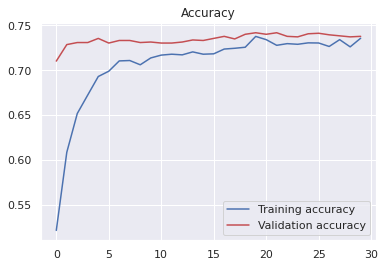

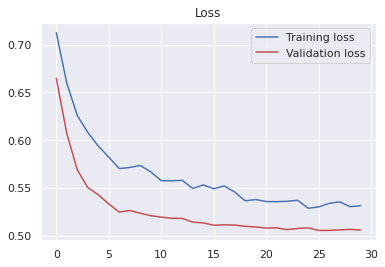

In [37]:
plt.plot(epochs, accuracy, 'b', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation accuracy')
plt.title('Accuracy')
plt.legend()
plt.show()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Loss')
plt.legend()
plt.show()

There is some problem here that the validation accuracy (loss) is higher (lower) than the training accuracy (loss).

Solution(s):

- Check stratitiedsplits

- Check how other models performed on the training set and validation set.

# 